In [10]:
# 📓 06_feature_engineering.ipynb

# === 1. Imports and Setup ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath("../"))

from src.config import FRAUD_WITH_GEO_PATH, FRAUD_CLEANED_PATH
from src.utils import load_csv, convert_to_datetime


In [12]:
# Create directory if it doesn't exist
FIG_DIR = os.path.abspath("../reports/figures/fraud_fig/")
os.makedirs(FIG_DIR, exist_ok=True)

def save_plot(fig, filename):
    path = os.path.join(FIG_DIR, filename)
    fig.savefig(path, bbox_inches='tight')
    print(f"Saved: {path}")


In [13]:
# === 2. Load Merged Dataset ===
df = load_csv(FRAUD_WITH_GEO_PATH)
print(f" Loaded shape: {df.shape}")


[INFO] Loaded data: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\data\processed\fraud_with_geo.csv | Shape: (151112, 13)
 Loaded shape: (151112, 13)


In [14]:
# Ensure datetime format
df = convert_to_datetime(df, ['signup_time', 'purchase_time'])

# A.1 Hour of day
df['hour_of_day'] = df['purchase_time'].dt.hour

# A.2 Day of week
df['day_of_week'] = df['purchase_time'].dt.dayofweek  # 0=Monday

# A.3 Time since signup in hours
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

print("Time-based features added.")


Time-based features added.


In [15]:
# B.1 Number of transactions per user_id
df['user_tx_count'] = df.groupby('user_id')['user_id'].transform('count')

# B.2 Transactions per device
df['device_tx_count'] = df.groupby('device_id')['device_id'].transform('count')

# B.3 Transactions per IP
df['ip_tx_count'] = df.groupby('ip_int')['ip_int'].transform('count')

print(" Frequency-based features added.")


 Frequency-based features added.


In [16]:
# Preview
print(df[['purchase_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head())
print(df[['user_id', 'user_tx_count', 'device_tx_count', 'ip_tx_count']].head())

# Save to processed
df.to_csv(FRAUD_CLEANED_PATH, index=False)
print(f"Final feature-engineered data saved to: {FRAUD_CLEANED_PATH}")


        purchase_time  hour_of_day  day_of_week  time_since_signup
0 2015-04-18 02:47:11            2            5        1251.856111
1 2015-06-08 01:38:54            1            0           4.984444
2 2015-01-01 18:52:45           18            3           0.000278
3 2015-05-04 13:54:50           13            0         136.690278
4 2015-09-09 18:40:53           18            2        1211.516944
   user_id  user_tx_count  device_tx_count  ip_tx_count
0    22058              1                1            1
1   333320              1                1            1
2     1359              1               12           12
3   150084              1                1            1
4   221365              1                1            1
Final feature-engineered data saved to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\data\processed\fraud_cleaned.csv


Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\hour_of_day_dist.png


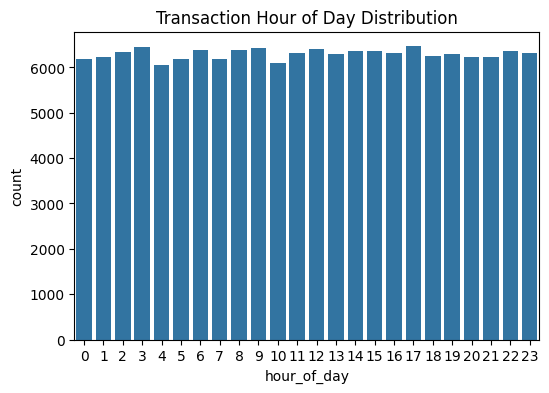

Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\day_of_week_dist.png


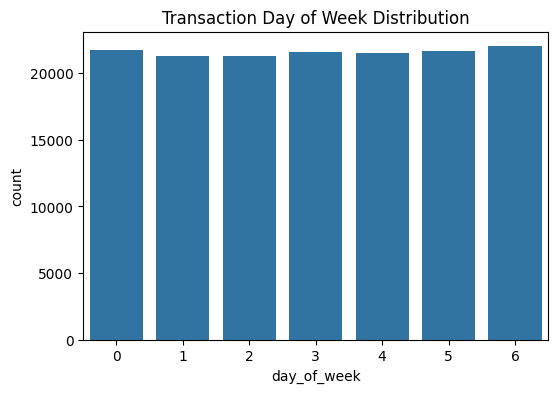

Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\time_since_signup_dist.png


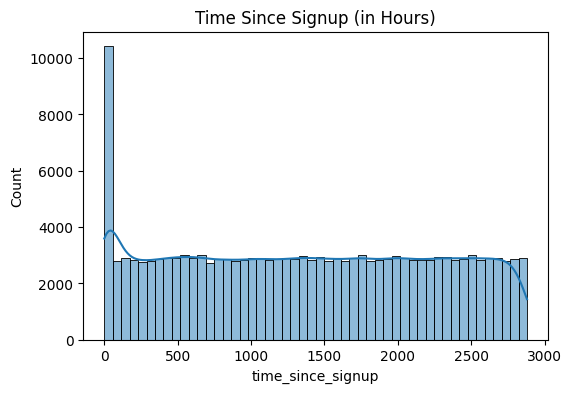

In [21]:
# === Hour of Day Distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='hour_of_day', data=df, ax=ax)
ax.set_title("Transaction Hour of Day Distribution")
save_plot(fig, "hour_of_day_dist.png")
plt.show()

# === Day of Week Distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='day_of_week', data=df, ax=ax)
ax.set_title("Transaction Day of Week Distribution")
save_plot(fig, "day_of_week_dist.png")
plt.show()

# === Time Since Signup
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df['time_since_signup'], bins=50, kde=True, ax=ax)
ax.set_title("Time Since Signup (in Hours)")
save_plot(fig, "time_since_signup_dist.png")
plt.show()

Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\user_tx_count.png


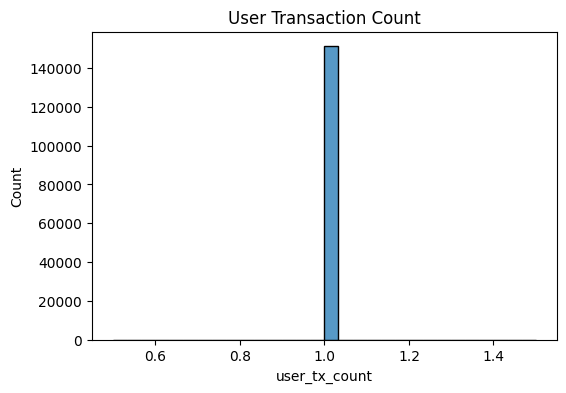

Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\device_tx_count.png


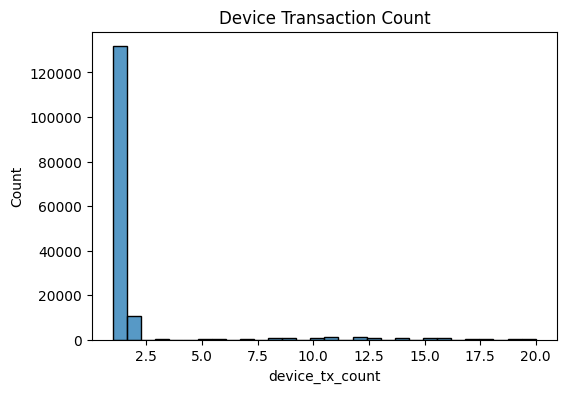

Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\ip_tx_count.png


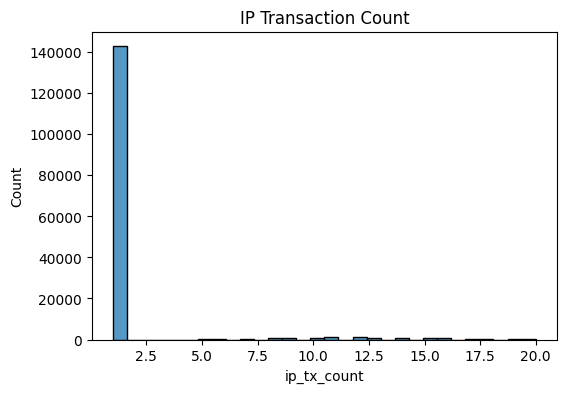

In [22]:
# === User Transaction Frequency
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df['user_tx_count'], bins=30, ax=ax)
ax.set_title("User Transaction Count")
save_plot(fig, "user_tx_count.png")
plt.show()

# === Device Transaction Frequency
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df['device_tx_count'], bins=30, ax=ax)
ax.set_title("Device Transaction Count")
save_plot(fig, "device_tx_count.png")
plt.show()

# === IP Transaction Frequency
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df['ip_tx_count'], bins=30, ax=ax)
ax.set_title("IP Transaction Count")
save_plot(fig, "ip_tx_count.png")
plt.show()
